In [1]:
%cd ..

/Users/crupley/gal/hoodie


In [9]:
%matplotlib notebook

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cPickle as pickle

from code.featurize import featurizer

<IPython.core.display.Javascript object>


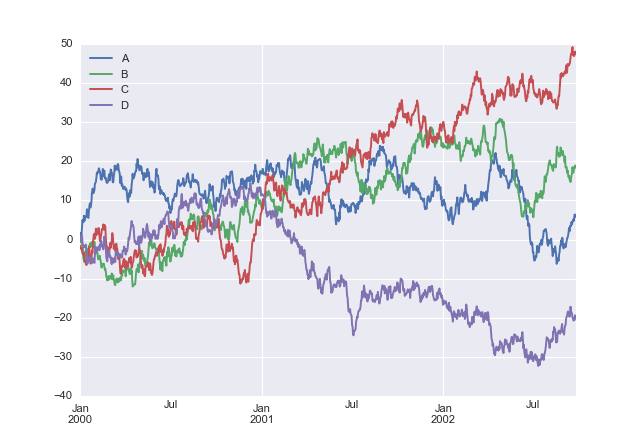

In [21]:
# interactive test
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()

d = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])
d = d.cumsum()
d.plot(); plt.legend(loc='best')  

In [20]:
df = pickle.load(open('features.pkl', 'rb'))
df.head()

,lat,lon,taxable_value,grocery,restaurant,retail,ncrimes,sgnf,avg_hh_size,population,walkscore
0,37.750067,-122.441075,718895.248337,-0.000153,-0.014650,0.158808,123.369982,-0.035714,1.806452,112,80.172298
1,37.750196,-122.438933,834313.797096,-0.002185,0.169033,-0.076971,105.325899,0.039474,2.375000,152,83.318625
2,37.756794,-122.436270,900225.127625,-0.012031,0.008118,0.125270,143.830470,-0.284672,1.902778,137,93.471872
3,37.753529,-122.437050,820289.998581,0.218998,0.471783,0.216543,110.432877,-0.019108,2.308824,157,91.519785
4,37.755758,-122.433400,776981.611641,-0.008045,-0.010146,0.052978,137.947900,-0.065789,2.140845,152,92.032526


<IPython.core.display.Javascript object>


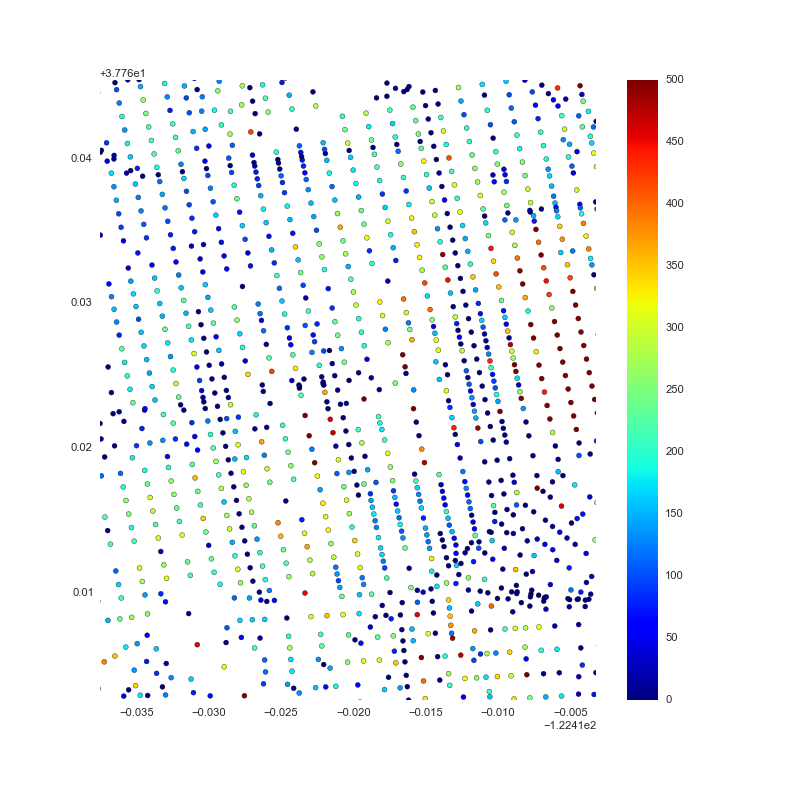

In [42]:
%matplotlib notebook
plt.figure(figsize = (10, 10))
plt.scatter(df.lon, df.lat, c=df.population, cmap='jet')
plt.axis('equal')
plt.margins(0)
plt.clim(0, 500)
plt.colorbar()
plt.show()


In [46]:
# distance grid
dist = 1e9 * np.ones((df.shape[0], df.shape[0]))
dist.shape

(7334, 7334)

In [51]:
def get_dist(df, idx1, idx2):
    dx = df.ix[idx1].lon - df.ix[idx2].lon
    dy = df.ix[idx1].lat - df.ix[idx2].lat
    return np.sqrt(dx**2 + dy**2)

get_dist(df, 1, 2)

0.0071150067336621936

In [55]:
%%time
dtest = df.iloc[:1000, :1000]

for i in dtest.index:
    for j in dtest.index:
        dist[i, j] = get_dist(dtest, i, j)

CPU times: user 8min 16s, sys: 8.03 s, total: 8min 24s
Wall time: 8min 22s


Estimated 7 hours for full completion

<matplotlib.colorbar.Colorbar instance at 0x11401e128>

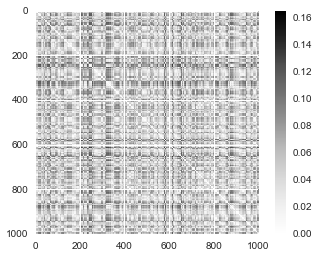

In [58]:
%matplotlib inline
plt.imshow(dist[:1000, :1000])
plt.colorbar()

In [68]:
df.loc[(df.lat < 37.7805) & 
       (df.lat > 37.78) &
       (df.lon < -122.395) &
       (df.lon > -122.425)]

,lat,lon,taxable_value,grocery,restaurant,retail,ncrimes,sgnf,avg_hh_size,population,walkscore
266,37.780407,-122.405782,115299.114559,0.955589,0.801921,5.791459,2085.008235,-0.260000,2.092105e+00,200,95.893731
2269,37.780012,-122.405274,341102.198959,0.602379,0.219778,4.360461,1710.947092,-0.186992,1.584416e+00,369,95.626862
2329,37.780125,-122.400997,54423.950314,0.402149,1.188971,0.751388,885.887753,-0.176471,2.428571e+00,17,94.470357
3093,37.780499,-122.413199,3872894.084213,0.429736,1.747986,1.534701,5521.749058,-0.213483,1.618182e+00,89,98.886894
3193,37.780492,-122.395341,699671.661327,0.018144,0.936959,0.527662,302.693883,-0.310924,2.333333e+00,238,93.961728
4221,37.780095,-122.395843,396606.669098,-0.036230,1.272421,1.530261,510.572023,-0.020408,1.531250e+00,49,94.437380
4819,37.780454,-122.421199,252458.846153,0.144359,1.184044,1.879701,830.102443,-0.049505,1.375000e+00,101,97.005465
5987,37.780150,-122.416040,860426.486389,-0.075702,1.537306,0.360929,1233.796633,-1.000000,-2.910383e-11,3,98.050476
6527,37.780249,-122.422815,557762.559631,0.580897,0.878874,-0.365756,565.771641,-0.193548,1.347826e+00,62,97.002374
6532,37.780417,-122.419431,4832906.819809,0.077216,2.312448,3.251130,849.083496,-0.047619,1.250000e+00,21,97.022980


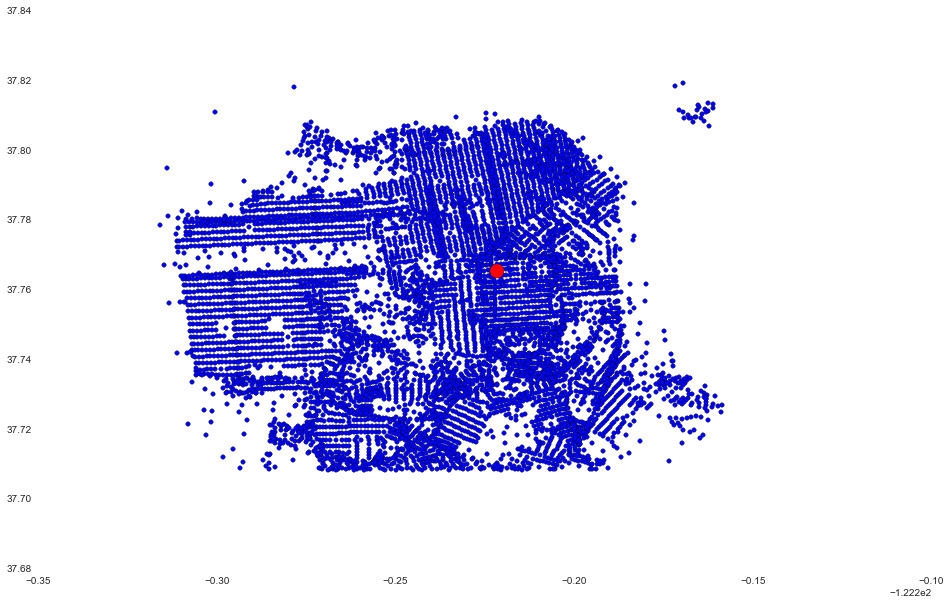

In [73]:
plt.rcParams['figure.figsize'] = 16, 10
plt.scatter(df.lon, df.lat)
plt.scatter(df.ix[105].lon, df.ix[105].lat, c='red', s=200)

In [74]:
tn = 105
testnode = df.ix[105]
testnode

lat                  37.765334
lon                -122.421672
taxable_value    770371.217598
grocery               0.926376
restaurant           10.395642
retail                7.484208
ncrimes            1763.081479
sgnf                  0.010309
avg_hh_size           4.333333
population           97.000000
walkscore            98.707194
Name: 105, dtype: float64

In [76]:
def window(df, latmin, latmax, lonmin, lonmax):
    df = df[df.lat > latmin]
    df = df[df.lat < latmax]
    df = df[df.lon > lonmin]
    df = df[df.lon < lonmax]
    return df

window(df, 37.78, 37.7805, -122.425, -122.395).head()

,lat,lon,taxable_value,grocery,restaurant,retail,ncrimes,sgnf,avg_hh_size,population,walkscore
266,37.780407,-122.405782,115299.114559,0.955589,0.801921,5.791459,2085.008235,-0.260000,2.092105,200,95.893731
2269,37.780012,-122.405274,341102.198959,0.602379,0.219778,4.360461,1710.947092,-0.186992,1.584416,369,95.626862
2329,37.780125,-122.400997,54423.950314,0.402149,1.188971,0.751388,885.887753,-0.176471,2.428571,17,94.470357
3093,37.780499,-122.413199,3872894.084213,0.429736,1.747986,1.534701,5521.749058,-0.213483,1.618182,89,98.886894
3193,37.780492,-122.395341,699671.661327,0.018144,0.936959,0.527662,302.693883,-0.310924,2.333333,238,93.961728


In [105]:
neibs = window(df, testnode.lat - 0.005,
                   testnode.lat + 0.005,
                   testnode.lon - 0.003,
                   testnode.lon + 0.003)
neibs = neibs[['lat', 'lon']]
neibs.drop(tn, axis=0, inplace=True)
neibs.shape

(62, 2)

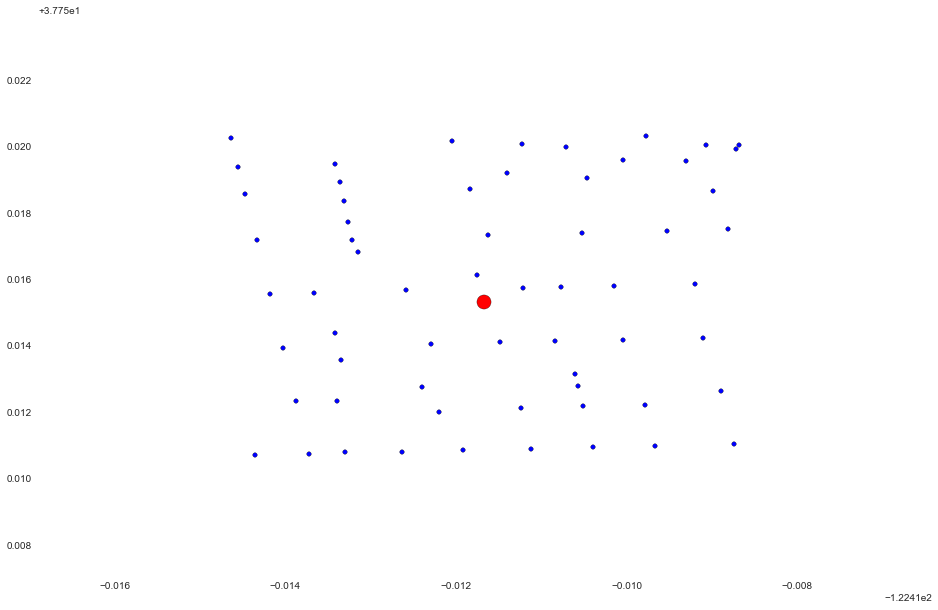

In [90]:
plt.scatter(neibs.lon, neibs.lat)
plt.scatter(testnode.lon, testnode.lat, c='red', s=200)
plt.margins(0)

In [115]:
def dist(lat1, lon1, lat2, lon2):
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    return np.sqrt(dlat**2 + dlon**2)

In [119]:
neibs['dist'] = neibs.apply(lambda x: dist(x.lat, x.lon, testnode.lat, testnode.lon), axis=1)
neibs = neibs.sort_values('dist')
neibs.head()

,lat,lon,dist
6952,37.765772,-122.421217,0.000631
173,37.766146,-122.421749,0.000816
2164,37.765692,-122.422581,0.000977
6415,37.765801,-122.420770,0.001016
6500,37.764127,-122.421486,0.001221


In [146]:
def angle(testnode, neib1, neib2):
    v1 = testnode[['lat', 'lon']] - neib1[['lat', 'lon']]
    v2 = testnode[['lat', 'lon']] - neib2[['lat', 'lon']]
    return np.arccos(v1.dot(v2) / np.linalg.norm(v1) / np.linalg.norm(v2)) * 180 / np.pi

In [145]:

v1 = testnode[['lat', 'lon']] - neibs.ix[6952][['lat', 'lon']]
v2 = testnode[['lat', 'lon']] - neibs.ix[6415][['lat', 'lon']]
np.arccos(v1.dot(v2) / np.linalg.norm(v1) / np.linalg.norm(v2)) * 180 / np.pi

16.586273215379499

In [147]:
angle(testnode, neibs.ix[6952], neibs.ix[6415])

16.586273215379499

In [186]:
neibs.ix[2164]

lat      37.765692
lon    -122.422581
dist      0.000977
Name: 2164, dtype: float64

In [189]:
closeix = [neibs.index[0]]
i = 0
while len(closeix) < 4:
    i += 1
    idx = neibs.index[i]
    angles = [angle(testnode, neibs.ix[idx], neibs.ix[j]) for j in closeix]
    if np.all(np.array(angles) > 45):
        closeix.append(idx)
closeix
    

[6952, 173, 2164, 6500]

In [174]:
i = 173
angles = [angle(testnode, neibs.ix[i], neibs.ix[j]) for j in closeix]
angles

[51.496249804555312, nan, 63.088652978313945, 176.64731862595917]

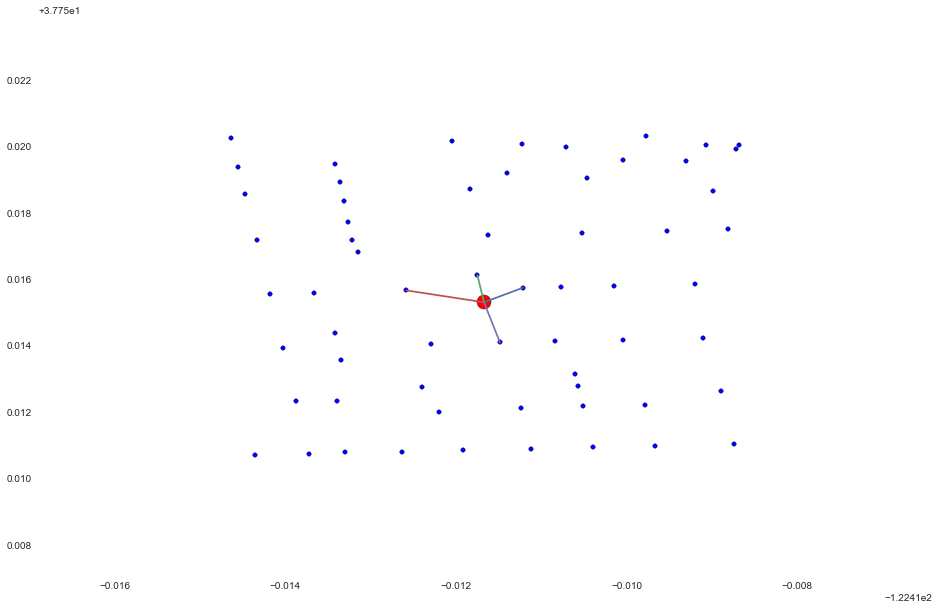

In [190]:
plt.scatter(neibs.lon, neibs.lat)
plt.scatter(testnode.lon, testnode.lat, c='red', s=200)
for neib in closeix:
    plt.plot([testnode.lon, neibs.ix[neib].lon], [testnode.lat, neibs.ix[neib].lat])

plt.margins(0)

In [191]:
from code.featurize import find_closest

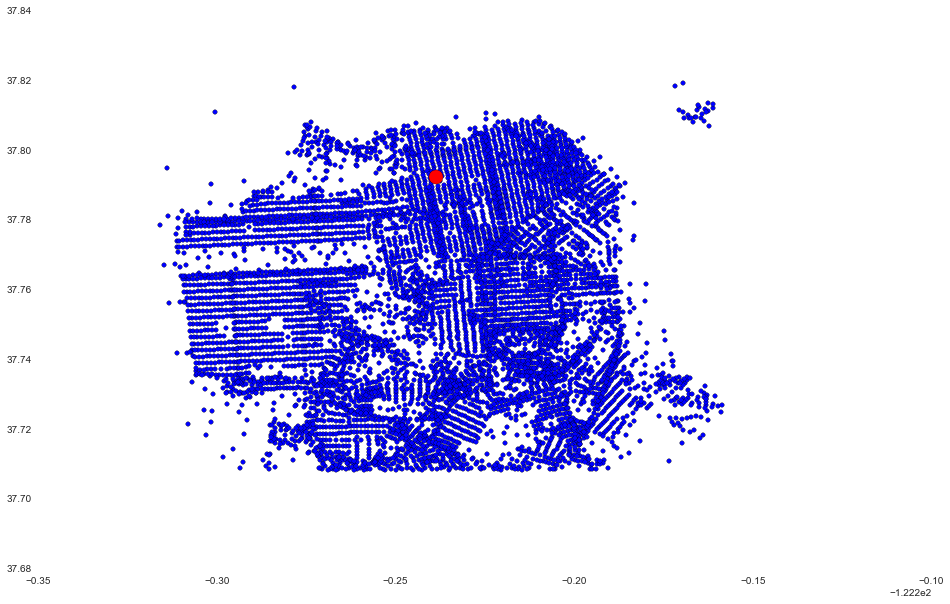

In [203]:
plt.scatter(df.lon, df.lat)
plt.scatter(df.ix[4546].lon, df.ix[4546].lat, c='red', s=200)

In [229]:
%timeit closeix = find_closest(testnode, df)

1 loops, best of 3: 219 ms per loop


Est. 26 minutes to find all edges

3366


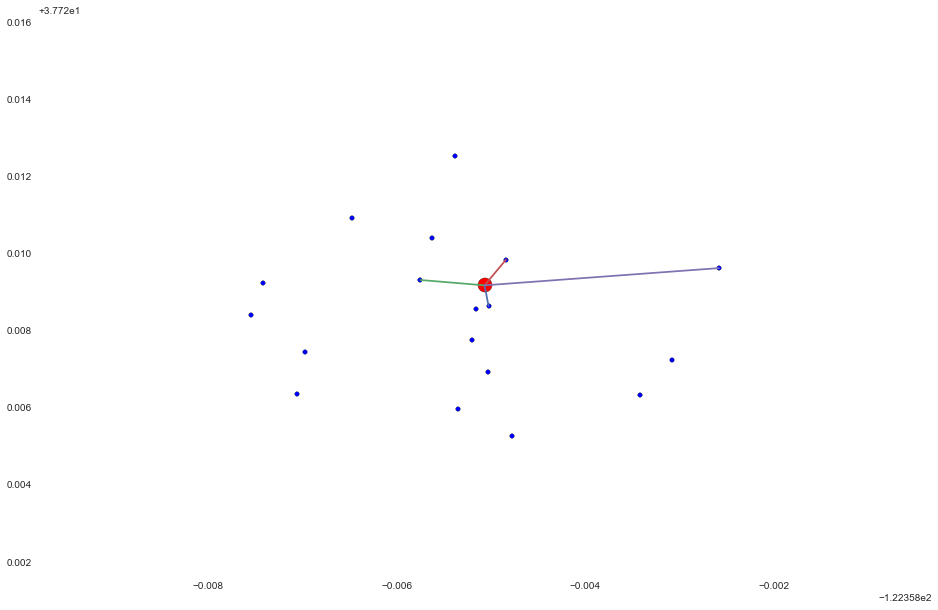

In [255]:
# view random node connections
testnode = df.ix[np.random.choice(df.index)]
print testnode.name
neibs = window(df, testnode.lat - 0.005,
                   testnode.lat + 0.005,
                   testnode.lon - 0.003,
                   testnode.lon + 0.003)
neibs = neibs[['lat', 'lon']]
neibs.drop(testnode.name, axis=0, inplace=True)

closeix = find_closest(testnode, df)
plt.scatter(neibs.lon, neibs.lat)
plt.scatter(testnode.lon, testnode.lat, c='red', s=200)
for neib in closeix:
    plt.plot([testnode.lon, neibs.ix[neib].lon], [testnode.lat, neibs.ix[neib].lat])

plt.margins(0)

Questionable nodes:
5464

# Plotting many line segments

http://stackoverflow.com/questions/21352580/matplotlib-plotting-numerous-disconnected-line-segments-with-different-colors

In [ ]:
N = 60000
_s = np.random.rand(N) #x1
_t = np.random.rand(N) #x2
_u = np.random.rand(N) #y1
_v = np.random.rand(N) #y2
x = []
y = []
for s, t, u, v in zip(_s, _t, _u, _v):
    x.append(s)
    x.append(u)
    x.append(None)
    y.append(t)
    y.append(v)
    y.append(None)
print timeit(lambda:plt.plot(x, y), number=1)